# Импортируем библиотеки

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sb
from sklearn.model_selection import train_test_split
import numpy as np
import time

# Генерируем данные

In [87]:

def nearby_set(n_clusters=10, mindots=60, maxdots=500, distance = 0.8):
    X_data = np.array([np.array([]), np.array([])]).T
    y_data = np.array([])
    for i in range(0, int(n_clusters**0.5)):
        for j in range(0, int(n_clusters**0.5)):
            count = np.random.randint(mindots, maxdots)
            X = np.array([np.random.ranf(count)*distance + i, np.random.ranf(count)*distance + j]).T
            y = np.array([int(n_clusters**0.5)*i+j]*count)
            X_data = np.concatenate((X_data, X))
            y_data = np.concatenate((y_data, y))
    for i in range(0, n_clusters - int(n_clusters**0.5)**2):
        count = np.random.randint(mindots, maxdots)
        X = np.array([np.random.ranf(count)*distance + int(n_clusters**0.5), np.random.ranf(count)*distance + i]).T
        y = np.array([int(n_clusters**0.5)**2+i]*count)
        X_data = np.concatenate((X_data, X))
        y_data = np.concatenate((y_data, y))
    return X_data, y_data


In [88]:
def f(n = 1):
    x = np.array([np.array([]), np.array([])]).T
    y = np.array([])
    y_ = []
    n2 = []
    s = 0
    for p in range(n*2):
        for i in range(10):
            for j in range(10):
                n2.append(s)
                s += 1
                x_ = np.array()
                np.concatenate((X_data, X))
                y.append(random.randint(0 + p * 100, 100 + p * 100))
        y_.append(p)
    return x, y, y_, n2

# SVM

In [89]:
from sklearn import svm
from sklearn.metrics import mean_squared_error as mse, r2_score
from sklearn.metrics import accuracy_score
def svm_(X_train, y_train):
    C = 1.0  # = self._alpha in our algorithm
    model1 = svm.SVC(kernel='linear', C=C)
    model1 = svm.LinearSVC(C=C, max_iter=10000)
    start_time = time.time()
    model1.fit(X_train, y_train)
    y_predict = model1.predict(X_test)
    print(accuracy_score(y_test, y_predict))
    print(f"Время: {time.time()-start_time}")

# KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier
def knn(X_train, y_train):
    knn = KNeighborsClassifier(n_neighbors = 25)
    start_time = time.time()
    model = knn.fit(X_train, y_train)

    y_predict = model.predict(X_test)
    print(accuracy_score(y_test, y_predict))
    print(f"Время: {time.time()-start_time}")

# Сравнение SVM и KNN

<font color = "grey"><font size = 6>knn</font></font>

1.0
Время: 0.003989458084106445


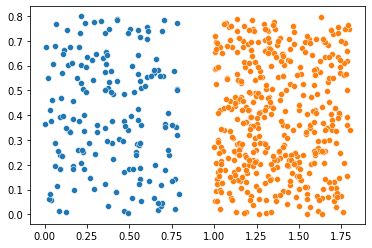

In [91]:
X, y = nearby_set(n_clusters = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in range (0, 10):
    sb.scatterplot(x = X[y == i].T[0], y = X[y == i].T[1])
knn(X_train, y_train)

<font color = "grey"><font size = 6>svm</font></font>

1.0
Время: 0.001028299331665039


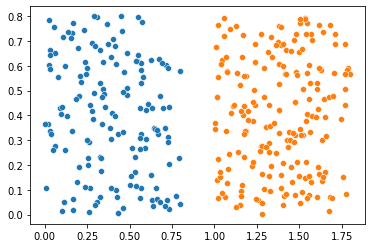

In [92]:
X, y = nearby_set(n_clusters = 2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in range (0, 10):
    sb.scatterplot(x = X[y == i].T[0], y = X[y == i].T[1])
svm_(X_train, y_train)

<font color = "grey"><font size = 6>knn</font></font>

0.9983136593591906
Время: 0.01596212387084961


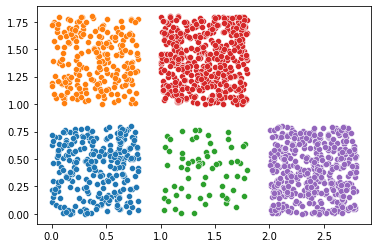

In [93]:
X, y = nearby_set(n_clusters = 5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
for i in range (0, 10):
    sb.scatterplot(x = X[y == i].T[0], y = X[y == i].T[1])
knn(X_train, y_train)

<font color = "grey"><font size = 6>svm</font></font>

0.9596153846153846
Время: 0.006974935531616211


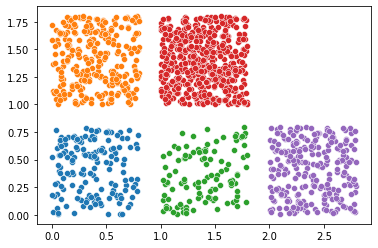

In [94]:
X, y = nearby_set(n_clusters = 5)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
for i in range (0, 10):
    sb.scatterplot(x = X[y == i].T[0], y = X[y == i].T[1])
svm_(X_train, y_train)

<font color = "grey"><font size = 6>knn</font></font>

0.9989224137931034
Время: 0.0528264045715332


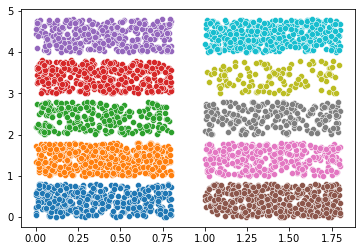

In [95]:
X, y = nearby_set(n_clusters = 30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in range (0, 10):
    sb.scatterplot(x = X[y == i].T[0], y = X[y == i].T[1])
knn(X_train, y_train)

<font color = "grey"><font size = 6>svm</font></font>

0.6264333132166566
Время: 1.9999806880950928


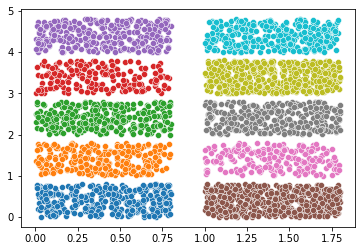

In [96]:
X, y = nearby_set(n_clusters = 30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for i in range (0, 10):
    sb.scatterplot(x = X[y == i].T[0], y = X[y == i].T[1])
svm_(X_train, y_train)

# Вывод

При одинаковых данных заметим, что SVM работал слегка быстрее, чем KNN при кластерах = {2, 5}.
<p></p>
Однако при количестве кластеров = 30 SVM стал сильно медленнее, нежели KNN, а его предсказания заметно ухудшились.